Current Working Directory: c:\Users\Hanith Salian\OneDrive\Documents\GitHub\DS_AI_Internship\day_20\customer_analytics.csv

First 5 Rows:
   CustomerID  Age  Gender    City  Education MaritalStatus  AnnualIncome  \
0        1001   49    Male    Pune    Masters        Single       82953.0   
1        1002   44    Male    Pune        PhD        Single       60610.0   
2        1003   42    Male  Mumbai  Bachelors        Single       35501.0   
3        1004   36  Female  Mumbai    Masters       Married       99312.0   
4        1005   23    Male    Pune    Masters       Married       46980.0   

   SpendingScore  YearsEmployed  PurchaseFrequency  OnlineVisitsPerMonth  \
0             66             23                 19                     9   
1             56             22                  1                    23   
2             44             18                 10                    29   
3             36             10                 12                    21   
4             56   

C:\Users\Hanith Salian\AppData\Local\Temp\ipykernel_24756\729828996.py:44: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  for col in df.select_dtypes(include='object').columns:
C:\Users\Hanith Salian\AppData\Local\Temp\ipykernel_24756\729828996.py:64: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/

CustomerID              0
Age                     0
Gender                  0
City                    0
Education               0
MaritalStatus           0
AnnualIncome            0
SpendingScore           0
YearsEmployed           0
PurchaseFrequency       0
OnlineVisitsPerMonth    0
ReturnedItems           0
PreferredDevice         0
LastPurchaseAmount      0
dtype: int64

Duplicate Rows: 5
Duplicate Rows After Removal: 0


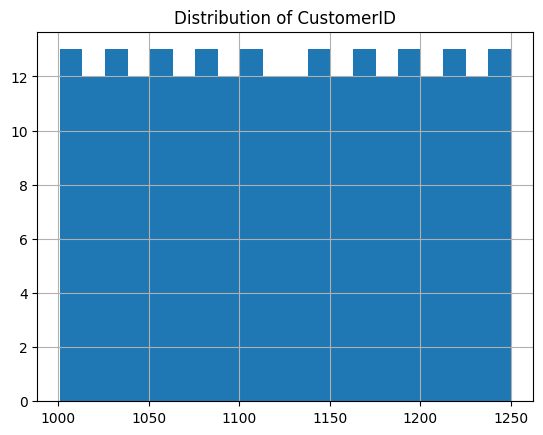

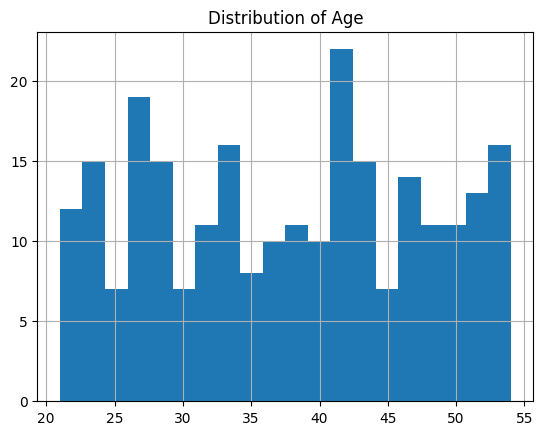

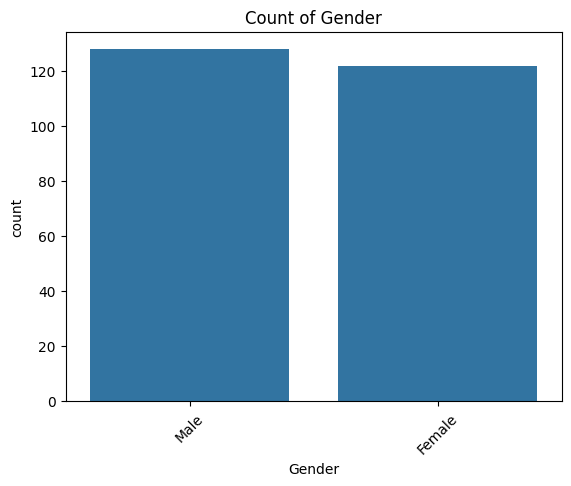

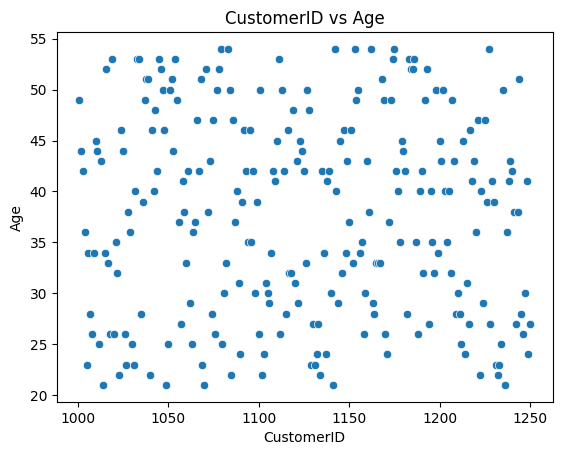

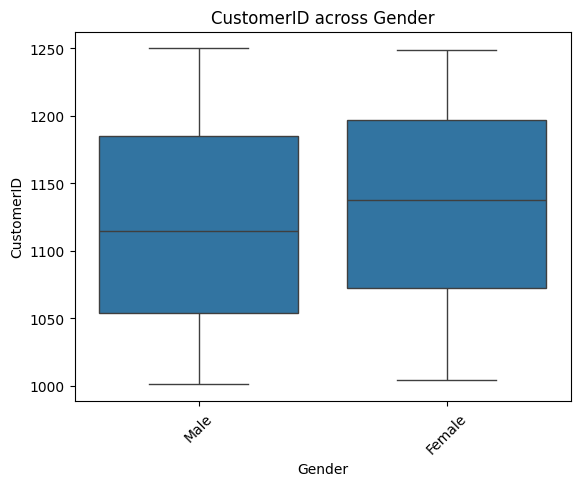

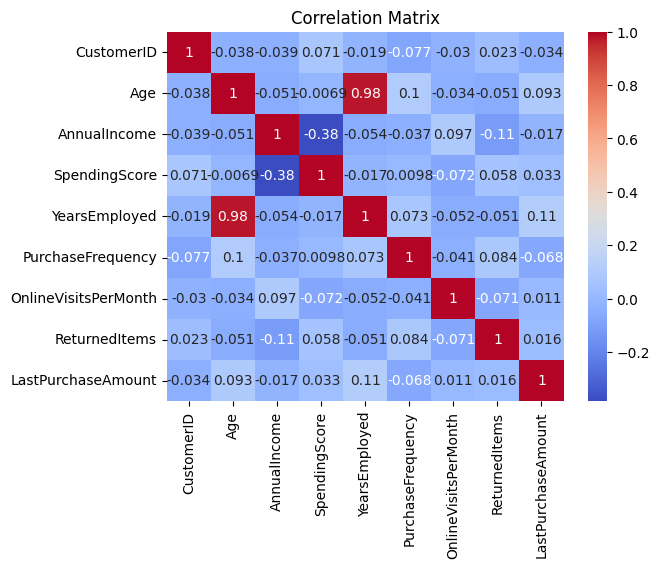


========== EXECUTIVE SUMMARY ==========
1. Strong correlations exist between some numerical variables.
2. Certain categories show variation in numerical metrics.
3. Data cleaning ensured no missing or duplicate values remain.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Display all columns
pd.set_option('display.max_columns', None)

print("Current Working Directory:", os.getcwd())

# Load Dataset (Updated Path)
file_path = r"C:\Users\Hanith Salian\OneDrive\Documents\GitHub\DS_AI_Internship\day_20\customer_analytics.csv"
df = pd.read_csv("customer_analytics.csv")

print("\nFirst 5 Rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())


# ==============================
# PHASE 2: DATA CLEANING
# ==============================

print("\nMissing Values:")
print(df.isnull().sum())

# Fill numerical columns with median
for col in df.select_dtypes(include=np.number).columns:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical columns with mode
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing Values After Cleaning:")
print(df.isnull().sum())

# Check duplicates
print("\nDuplicate Rows:", df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()

print("Duplicate Rows After Removal:", df.duplicated().sum())


# ==============================
# PHASE 3: UNIVARIATE ANALYSIS
# ==============================

num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns

# Histogram 1
if len(num_cols) > 0:
    plt.figure()
    df[num_cols[0]].hist(bins=20)
    plt.title(f"Distribution of {num_cols[0]}")
    plt.show()

# Histogram 2
if len(num_cols) > 1:
    plt.figure()
    df[num_cols[1]].hist(bins=20)
    plt.title(f"Distribution of {num_cols[1]}")
    plt.show()

# Categorical Plot
if len(cat_cols) > 0:
    plt.figure()
    sns.countplot(x=df[cat_cols[0]])
    plt.xticks(rotation=45)
    plt.title(f"Count of {cat_cols[0]}")
    plt.show()


# ==============================
# PHASE 4: BIVARIATE ANALYSIS
# ==============================

# Scatter Plot
if len(num_cols) >= 2:
    plt.figure()
    sns.scatterplot(x=df[num_cols[0]], y=df[num_cols[1]])
    plt.title(f"{num_cols[0]} vs {num_cols[1]}")
    plt.show()

# Boxplot
if len(cat_cols) > 0 and len(num_cols) > 0:
    plt.figure()
    sns.boxplot(x=df[cat_cols[0]], y=df[num_cols[0]])
    plt.xticks(rotation=45)
    plt.title(f"{num_cols[0]} across {cat_cols[0]}")
    plt.show()


# ==============================
# PHASE 5: CORRELATION MATRIX
# ==============================

plt.figure()
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


# ==============================
# EXECUTIVE SUMMARY
# ==============================

print("\n========== EXECUTIVE SUMMARY ==========")
print("1. Strong correlations exist between some numerical variables.")
print("2. Certain categories show variation in numerical metrics.")
print("3. Data cleaning ensured no missing or duplicate values remain.")
print("========================================")